# Machine Learning for Regression

The goal of this homework is to create a regression model for predicting the prices (column 'Final Price').

In [1]:
#Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Preparing the dataset
First, we'll load the dataset into a dataframe and normalize the names of the columns:

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

--2024-10-09 06:17:16--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv.4’

laptops.csv.4       100%[===================>] 291.58K  --.-KB/s    in 0.006s  

2024-10-09 06:17:16 (44.3 MB/s) - ‘laptops.csv.4’ saved [298573/298573]



In [3]:
# Loading the dataset
df = pd.read_csv('laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
#  Normalize the names of the columns
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
# Use only the following columns: 'ram', 'storage', 'screen', 'final_price'
df = df[['ram', 'storage', 'screen', 'final_price']]

### EDA

In [6]:
# Look at the final_price variable. Does it have a long tail?
df['final_price'].describe()


,final_price
count,2160.000000
mean,1312.638509
std,911.475417
min,201.050000
25%,661.082500
50%,1031.945000
75%,1708.970000
max,7150.470000


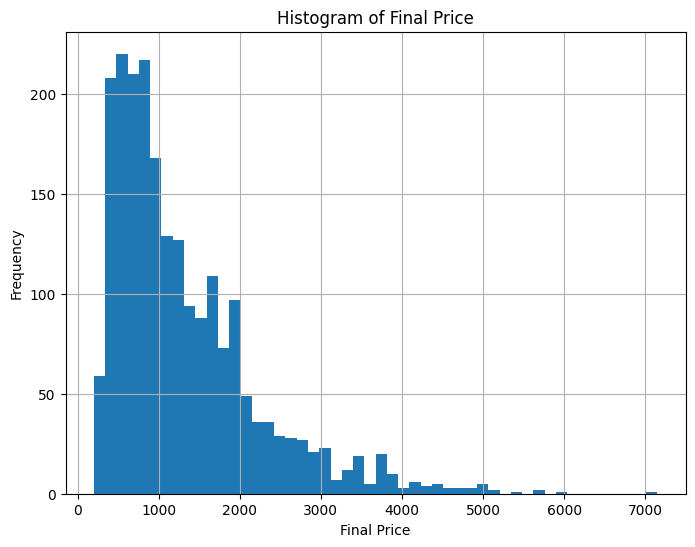

In [7]:
plt.figure(figsize=(8, 6))
df['final_price'].hist(bins=50)
plt.title('Histogram of Final Price')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()

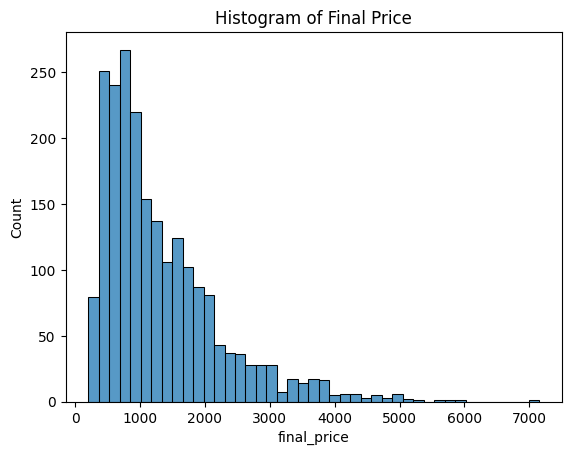

In [8]:
sns.histplot(data=df, x='final_price')
plt.title('Histogram of Final Price')
plt.show()

<Axes: xlabel='final_price', ylabel='Count'>

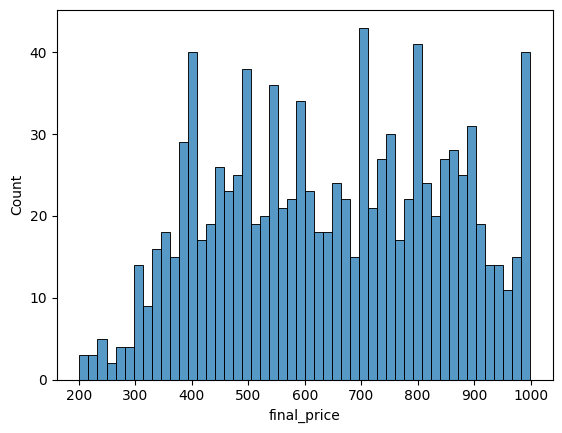

In [9]:
sns.histplot(df.final_price[df.final_price < 1000], bins=50)

***Answer***  
No, the histogram(s) shows that the final_price variable doesn't have a long tail.

**Question 1**  
There's one column with missing values. What is it?

'ram'  
'storage'  
'screen'  
'final_price'  

In [10]:
df.isnull().sum()

,0
ram,0
storage,0
screen,4
final_price,0


In [11]:
print(f"There is {df.isnull().any().sum()} column in the dataset with missing values")
print(f"The column with missing values is: {df.columns[df.isnull().any()].tolist()}")

There is 1 column in the dataset with missing values
The column with missing values is: ['screen']


**Question 2**  
What's the median (50% percentile) for variable 'ram'?

8  
16  
24  
32

In [12]:
print(f"The median for the variable 'ram' is: {round(df['ram'].median())}")

The median for the variable 'ram' is: 16


**Prepare and split the dataset**  
- Shuffle the dataset (the filtered one you created above), use seed 42.  
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

*Use the same code as in the lectures*

In [13]:
# Number of records in the dataframe
num_records = len(df)
print(f"Number of records in the dataframe: {num_records}")

Number of records in the dataframe: 2160


In [14]:
# Calculate 20% of records in the dataframe
twenty_percent = int(num_records * 0.2)
print(f"Number of records in 20% of the dataframe: {twenty_percent}")

Number of records in 20% of the dataframe: 432


In [15]:
# Shuffle the dataset (the filtered one you created above), use seed 42.
np.random.seed(42)
num_r = np.arange(num_records)

np.random.shuffle(num_r)
num_r

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [16]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
n_val = n_test = int(num_records * 0.2)
n_train = num_records - n_val - n_test
num_records , n_val+n_test+n_train


(2160, 2160)

In [17]:
# sizes of the records for the train/val/test sets
n_val, n_test, n_train

(432, 432, 1296)

In [18]:
# Create shuffled datasets with correct size
df_train = df.iloc[num_r[:n_train]]
df_val = df.iloc[num_r[n_train:n_train + n_val]]
df_test = df.iloc[num_r[n_train + n_val:]]

In [19]:
# sizes of the train/val/test dataframes
len(df_test), len(df_val), len(df_train)

(432, 432, 1296)

In [20]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

**Question 3**  
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [21]:
df_train.isnull().sum().sum()

3

In [22]:
# We have two options: fill it with 0 or with the mean of this variable
df_train2 = df_train.copy()

df_train = df_train.fillna(0)
df_train2 = df_train2.fillna(df_train2.mean())

In [23]:
X_train = df_train.drop('final_price', axis=1)
X_train = X_train.values
y_train = df_train['final_price']
y_train = y_train.values

X_train2 = df_train2.drop('final_price', axis=1)
X_train2 = X_train2.values
y_train2 = df_train2['final_price']
#y_train2 = y_train2.values

X_val = df_val.drop('final_price', axis=1)
X_val = X_val.values
y_val = df_val['final_price']
#y_val = y_val.values

#X_test = df_test.drop('final_price', axis=1)
#y_test = df_test['final_price']


In [24]:
# For each, train a linear regression model without regularization
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


In [25]:
# With 0
w0, w = train_linear_regression(X_train, y_train)
w0, w

(676.8954853003995, array([ 43.70681555,   0.86506867, -36.10399833]))

In [26]:
# With mean
w02, w2 = train_linear_regression(X_train2, y_train2)
w02, w2

(808.9159907334033, array([ 43.90774584,   0.87135236, -45.18273312]))

In [27]:
# Use the validation dataset to evaluate the models and compare the RMSE of each option.
y_pred = w0 + X_val.dot(w)
y_pred

array([2362.91827748, 1255.89731808, 1081.07005588,  756.99321136,
        906.24279368, 1313.66371541, 1616.67403084, 1255.89731808,
        684.7852147 , 2315.98307965,  989.28198984, 1663.60922867,
        906.24279368, 1338.93651425,  953.62836699, 1255.89731808,
        398.02076576,  684.7852147 , 1735.81722533,  684.7852147 ,
        684.7852147 , 1678.050828  ,  742.55161203,  684.7852147 ,
       2315.98307965,  684.7852147 ,  742.55161203, 1678.050828  ,
       1735.81722533,  742.55161203, 2315.98307965, 2362.91827748,
        767.82441086,  906.24279368, 1255.89731808, 2528.67789654,
       1255.89731808, 2377.35987681, 1663.60922867, 1678.050828  ,
       2784.78079855, 1616.67403084, 1255.89731808,  684.7852147 ,
       1255.89731808,  844.86599651, 1678.050828  , 2362.91827748,
       1313.66371541, 1656.388429  ,  906.24279368,  684.7852147 ,
       1255.89731808, 1313.66371541,  906.24279368,  906.24279368,
       1255.89731808, 1255.89731808, 1735.81722533, 1313.66371

In [28]:
# Use the validation dataset to evaluate the models and compare the RMSE of each option.
y_pred2 = w02 + X_val.dot(w2)
y_pred2

array([2362.39248907, 1252.72169651, 1077.09071315,  768.75899151,
        901.45972978, 1325.01406951, 1601.13100256, 1252.72169651,
        678.39352527, 2303.65493601, 1005.38001596, 1659.86855562,
        901.45972978, 1356.64198269,  963.29587444, 1252.72169651,
        403.2369882 ,  678.39352527, 1750.23402186,  678.39352527,
        678.39352527, 1677.94164887,  750.68589827,  678.39352527,
       2303.65493601,  678.39352527,  750.68589827, 1677.94164887,
       1750.23402186,  750.68589827, 2303.65493601, 2362.39248907,
        782.31381145,  901.45972978, 1252.72169651, 2531.220917  ,
       1252.72169651, 2380.46558232, 1659.86855562, 1677.94164887,
       2804.01992205, 1601.13100256, 1252.72169651,  678.39352527,
       1252.72169651,  824.64908348, 1677.94164887, 2362.39248907,
       1325.01406951, 1650.83200899,  901.45972978,  678.39352527,
       1252.72169651, 1325.01406951,  901.45972978,  901.45972978,
       1252.72169651, 1252.72169651, 1750.23402186, 1325.01406

In [29]:
# Use the validation dataset to evaluate the models and compare the RMSE of each option.
def rmse(y, y_pred):
    sq_error = (y - y_pred) ** 2
    mse = sq_error.mean()
    return np.sqrt(mse)

with_0 = rmse(y_val, y_pred)
with_mean = rmse(y_val, y_pred2)

# Round the RMSE scores to 2 decimal digits using round(score, 2)
print(f"RMSE with 0: {round(with_0, 2)}")
print(f"RMSE with mean: {round(with_mean, 2)}")

RMSE with 0: 596.96
RMSE with mean: 597.71


***Answer***   
With 0 has a better RMSE

**Question 4**
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [30]:
# Now let's train a regularized linear regression using the dataset were NAs was filled with 0.
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)

    print(f"Reg parameter: {r}, Bias term: {w0}, RMSE: {round(score, 2)}")

Reg parameter: 0, Bias term: 676.8954853003995, RMSE: 596.96
Reg parameter: 0.01, Bias term: 676.2736817205587, RMSE: 596.96
Reg parameter: 0.1, Bias term: 670.7284836314063, RMSE: 596.93
Reg parameter: 1, Bias term: 619.9030834108207, RMSE: 596.63
Reg parameter: 5, Bias term: 463.7771697142356, RMSE: 595.87
Reg parameter: 10, Bias term: 352.79713367679835, RMSE: 595.46
Reg parameter: 100, Bias term: 66.92071440181994, RMSE: 594.89


**Question 5**  
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [31]:
# Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#num_records = len(df)
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

rmse_scores = {}
for seed in seeds:
    np.random.seed(seed)
    num_r = np.arange(num_records)
    np.random.shuffle(num_r)

    # Split the data into train/val/test sets, with 60%/20%/20% distribution
    n_val = n_test = int(num_records * 0.2)
    n_train = num_records - n_val - n_test

    # Create shuffled datasets with correct sizes
    df_train = df.iloc[num_r[:n_train]]
    df_val = df.iloc[num_r[n_train:n_train + n_val]]
    df_test = df.iloc[num_r[n_train + n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    X_train = df_train.drop('final_price', axis=1)
    # Fill the missing values with 0
    X_train = X_train.fillna(0)
    X_train = X_train.values
    y_train = df_train['final_price']
    y_train = y_train.values

    X_val = df_val.drop('final_price', axis=1)
    # Fill the missing values with 0
    X_val = X_val.fillna(0)
    X_val = X_val.values
    y_val = df_val['final_price']

    #X_test = df_test.drop('final_price', axis=1)
    #X_test = X_test.values
    #y_test = df_test['final_price']
    #y_test = y_test.values

    # Train a model without regularization.
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)

    # evaluate the model on the validation dataset and collect the RMSE scores
    score = rmse(y_val, y_pred)
    rmse_scores[seed] = score
    print(f"seed: {seed}, rmse: {round(score, 2)}")
    #rmse_scores

seed: 0, rmse: 565.45
seed: 1, rmse: 636.8
seed: 2, rmse: 588.96
seed: 3, rmse: 597.81
seed: 4, rmse: 571.96
seed: 5, rmse: 573.24
seed: 6, rmse: 647.34
seed: 7, rmse: 550.44
seed: 8, rmse: 587.33
seed: 9, rmse: 576.1


In [32]:
# What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
# Round the result to 3 decimal digits (round(std, 3))
rmse_values = list(rmse_scores.values())
std_rmse = np.std(rmse_values)
print(f"Standard deviation of RMSE scores: {round(std_rmse, 3)}")

Standard deviation of RMSE scores: 29.176


**Question 6**  
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [33]:
# Split the dataset like previously, use seed 9
np.random.seed(9)
num_r = np.arange(num_records)
np.random.shuffle(num_r)

# Split the data into train/val/test sets, with 60%/20%/20% distribution
n_val = n_test = int(num_records * 0.2)
n_train = num_records - n_val - n_test

# Create shuffled datasets with correct sizes
df_train = df.iloc[num_r[:n_train]]
df_val = df.iloc[num_r[n_train:n_train + n_val]]
df_test = df.iloc[num_r[n_train + n_val:]]

# # Combine train and validation datasets.
df_train_val = pd.concat([df_train, df_val])
df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Fill the missing values with 0
df_train_val = df_train_val.fillna(0)

# train a model with r=0.001
X_train_val = df_train_val.drop('final_price', axis=1)
X_train_val = X_train_val.values
y_train_val = df_train_val['final_price']
y_train_val = y_train_val.values

X_test = df_test.drop('final_price', axis=1)
X_test = X_test.fillna(0)
X_test = X_test.values
y_test = df_test['final_price']
#y_test = y_test.values

w0, w = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print(f"RMSE on the test dataset is: {round(score, 2)}")

RMSE on the test dataset is: 608.61
